# Convolutional Neural Networks 3: Filling the Gaps

Welcome to the third notebook in Convolutional Neural Networks. In this notebook, we will explore Global Pooling, and revisit the idea of convolution to fill some gaps. Let's get started.

## Revisiting Pooling: Global Pooling


We previously talked about pooling and flattening layers, now we will see a layer type that combines both of these ideas to get rid of flattening layers and fully connected layers in most cases. I will explain how Global Average Pooling works and Global Max Pooling works in a quite similar way except that it takes the max value, so let's get started.


Previously we learnt that the flattening layer takes a feature map and converts it to a 1-D vector so that we can feed the feature map to dense layers. Global Average Pooling does the same thing, however, it uses a different strategy. It takes the  feature map, calculates the average over entire feature, and outputs the result (the kernel size is height x width). We apply this operation to each feature map and then stack these values into a column vector (1-D vector). Let's see an illustration of it and add this layer to our previous architecture instead of the flattening layer.


<img src="imgs/image1.png" width="70%">
<a href=""> Source </a>

Let's use `GlobalAveragePooling2D()` instead of `Flatten()` layer to see if we can improve the results on MNIST.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
(X_train, y_train), (X_valid, y_valid) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=256, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [3]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       401536    
                                                        

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1875/1875 [==============================] - 61s 24ms/step - loss: 0.6240 - accuracy: 0.7896 - val_loss: 0.3701 - val_accuracy: 0.8641
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3934 - accuracy: 0.8706 - val_loss: 0.3203 - val_accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3352 - accuracy: 0.8877 - val_loss: 0.3559 - val_accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3029 - accuracy: 0.9003 - val_loss: 0.2896 - val_accuracy: 0.9017
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2692 - accuracy: 0.9104 - val_loss: 0.2701 - val_accuracy: 0.9060
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2466 - accuracy: 0.9169 - val_loss: 0.2778 - val_accuracy: 0.9095
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2228 - accuracy: 0.9250 - val_loss: 0.2596 -

As you can see the global average pooling layer helped us to reduce slightly the number of parameters to tune during training while also slightly improving the validation accuracy. On the other hand, this layer type is more often used to completely replace the dense layers except for the last one which we use to get class probabilities. Let's also get rid of other dense layers in our model except the last one and train it again.

In [5]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=256, kernel_size=7,activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 28, 28, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       401536    
                                                      

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1875/1875 [==============================] - 48s 23ms/step - loss: 0.3999 - accuracy: 0.8533 - val_loss: 0.3698 - val_accuracy: 0.8620
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2741 - accuracy: 0.8989 - val_loss: 0.2867 - val_accuracy: 0.8911
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2356 - accuracy: 0.9129 - val_loss: 0.2740 - val_accuracy: 0.9003
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2014 - accuracy: 0.9258 - val_loss: 0.2646 - val_accuracy: 0.8991
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1743 - accuracy: 0.9358 - val_loss: 0.2356 - val_accuracy: 0.9178
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1520 - accuracy: 0.9428 - val_loss: 0.2539 - val_accuracy: 0.9145
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1231 - accuracy: 0.9539 - val_loss: 0.2274 -

Dense layers are prone to overfitting and we generally employ dropout layers to get rid of this problem as much as possible. In addition to saving computational resources, GlobalPooling layers also make our model robust to overfitting by getting rid of the dense layers. On the other hand, using GlobalPooling is not a default choice and sometimes it is not desired since it also removes a lot of positional information. On the other hand, it may be useful to use it for classification problems in which we want our model to rely on the presence of an object such as "detection of a horse anywhere in an image", however, it may not be that useful for object detection applications. Nonetheless, there is no free lunch.

For learning more about global pooling, check out the links below.
1. [What does global pooling do?](https://stackoverflow.com/questions/42070528/what-does-global-pooling-do)
2. [Global Average Pooling Layers for Object Localization](https://alexisbcook.github.io/2017/global-average-pooling-layers-for-object-localization/)
3. [What is global max pooling layer and what is its advantage over maxpooling layer?](https://stats.stackexchange.com/questions/257321/what-is-global-max-pooling-layer-and-what-is-its-advantage-over-maxpooling-layer)



## Revisiting Convolution: Dimensions and Filter Sizes

In all the examples, we have gone through so far there was a term that might have taken your attention. Conv2D, AveragePooling2D and MaxPooling2D. What does that 2D represent? Well as we talked about previously while applying the convolution operation we slide the kernel over the height and weight axis, however, that is not the only option (even though it is the one that is most commonly used for our application purposes). Let's see how Conv1D and Conv3D are applied, as well as, in which use cases we need them.

### Convolution over Width (Conv1D)

<img src="imgs/gif1.gif" width="50%">
<a href=""> Source </a>

As you might already guess, Conv1D only slides the kernel over one axis, which is width. It is generally used for processing time-series data such as audio, or texts (Texts can also be represented as time-series data) as well as signals such as Electroencephalograms. In signal processing, they are heavily used for signal smoothing and they also have applications in generative deep learning (Casual CNNs). Let's see how to use Conv1D on an example.

In [ ]:
#Let's generate some random data.
input_shape = (4, 10, 128)
x = tf.random.normal(input_shape,seed=42)

In [ ]:
x.shape 

TensorShape([4, 10, 128])

The inputs are 128-length vectors with 10 timesteps with a batch size of 4. Let's plot one of them.

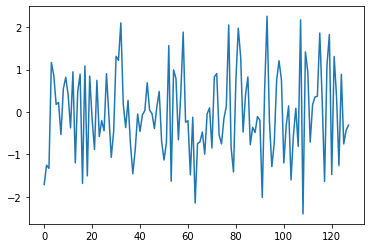

In [ ]:
plt.plot(x[0,1,:]);

Now I will use `tf.keras.layers.Conv1D()` on the data we generated above.

In [ ]:
y=tf.keras.layers.Conv1D(5, 3, activation=None,padding="same",input_shape=input_shape[1:])(x)

In [ ]:
y.shape

TensorShape([4, 10, 5])

Let's visualize the results for the first instance.

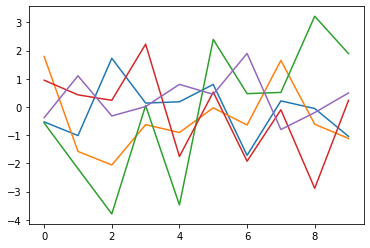

In [ ]:
plt.plot(y[0,:,:]);

For learning more about 1D Convolution, I recommend reading this article: [Convolution in one dimension for neural networks](https://e2eml.school/convolution_one_d.html)

We will later use Conv1D for Electroencephalogram Signal Classification in one of the upcoming notebooks.

### Convolution over Volumes (Conv3D)

<img src="imgs/image2.png" width="50%">
<a href=""> Source </a>

Using Conv1D we can slide a kernel over width, similarly using Conv2D we can slide a kernel over height and width. What if we want to slide the kernel over the height, width, and depth axis at the same? There comes the reason to use 3D Convolution operation. 3D Convolutions are generally used for volumetric data such as 3D images or videos. For instance, MRI and CT Scans are examples of 3D images which contain images from different angles that are stacked together.

<img src="imgs/image3.png" width="60%">


The images above are MR Images from the BraTS Dataset. In this dataset, each MR image is composed of 155 images stacked together (here I only show 40 of them). The whole 155 images can be visualized as the following:

<img src="imgs/gif2.gif" width="60%">


We can use a 2D convolution on each image and slide the over x and y axis to get feature maps that contain spatial correlations, however, by using a 3D convolution (let's say a kernel with a size of 3x3x3) we can generate feature maps that do not only carry spatial information of x and y axis but also capture the correlations within the images stacked on top of each other so that the generated cubic feature maps establish a relationship between the 3 dimensions. 

The same situation applies to videos as well, since they are composed of sequentially played frames. To capture the dependencies within multiple frames, we can employ 3a 3-D Convolutional Neural Network so that feature maps will be generated not only taking into account spatial information within each frame but also the temporal information of successive frames.

Later we will use a 3-D Convolutional Neural Network on CT Scans in one of the upcoming notebooks.

You can find more about 3D and 1D convolutions in the following resources:
1. [Deep Learning on Video (Part Three): Diving Deeper into 3D CNNs](https://towardsdatascience.com/deep-learning-on-video-part-three-diving-deeper-into-3d-cnns-cb3c0daa471e)
2. [Understanding 1D and 3D Convolution Neural Network | Keras](https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610)
3. [Deep Learning on Video (Part One): The Early Days…](https://towardsdatascience.com/deep-learning-on-video-part-one-the-early-days-8a3632ed47d4)
4. [Intuitive understanding of 1D, 2D, and 3D convolutions in convolutional neural networks](https://stackoverflow.com/questions/42883547/intuitive-understanding-of-1d-2d-and-3d-convolutions-in-convolutional-neural-n)
5. [Intuitive understanding of 1D, 2D, and 3D convolutions in convolutional neural networks.
](https://wandb.ai/ayush-thakur/dl-question-bank/reports/Intuitive-understanding-of-1D-2D-and-3D-convolutions-in-convolutional-neural-networks---VmlldzoxOTk2MDA)
6. [Why do we use 2D convolution for RGB images which are in fact 3D data cubes? Shouldn't we use 3D convolution for RGB and 4D for video?](https://www.quora.com/Why-do-we-use-2D-convolution-for-RGB-images-which-are-in-fact-3D-data-cubes-Shouldnt-we-use-3D-convolution-for-RGB-and-4D-for-video)
7. [Is there any use of using 3D convolutions for traditional images (like cifar10, imagenet)?](https://ai.stackexchange.com/questions/13975/is-there-any-use-of-using-3d-convolutions-for-traditional-images-like-cifar10)
8. [a-simple-conv3d-example-with-keras](https://github.com/christianversloot/machine-learning-articles/blob/main/a-simple-conv3d-example-with-keras.md)
9. [When should I use 3D convolutions?](https://ai.stackexchange.com/questions/13692/when-should-i-use-3d-convolutions)
10. [3D Convolutional Networks for Traffic Forecasting](http://resuly.me/2019/12/18/3d-convolutional-networks-for-traffic-forecasting/)
11. [Understanding Dimensions in CNNs](https://www.baeldung.com/cs/ml-understanding-dimensions-cnn)


### Kernel Size of 2D Convolutions

#### 3x3 Kernels

Previously, we used 7x7 kernels in our ConvNet model. In practice, however, 3x3 kernels are much more often used. The reason is that they are computationally less expensive. For instance, one 5x5 kernel has the same receptive field as two 3x3 kernels. However, we have 18 parameters to tune for two 3x3 kernels, whereas we have 25 parameters for one 5x5 kernel. Moreover, we can introduce non-linearity two times if we use two 3x3 kernels instead of one with a 5x5 kernel size.  We will see that many convolutional neural network architectures use 3x3 kernels.


#### 1x1 Kernels

As we talked about above, we generally prefer stacking kernels with relatively small kernel sizes, this may cause the number of filters to get high and increase the computational cost. Convolution layers with 1x1 kernel size are used to tackle this problem by applying cross-channel pooling operation to reduce the dimensionality while keeping the height and weight of the feature maps the same.

<img src="imgs/gif3.gif" width="30%">
<a href=""> Source </a>

The 1x1 kernel slides the input and calculates a linear product for each pixel (we are multiplying the input by a constant). In some sense, it works in the same way that dense layers work since its receptive field captures all the input. These convolutions are particularly useful for downsampling the feature maps, for instance, image if we have 256 feature maps in one of the intermediate layers of our CNN network. We can use a 1x1 convolutional layer to keep the spatial dimensions of the feature map the same while reducing the number of filters by multiplying the input with a different kernel every time. Moreover, we will be also adding some non-linearity to our network since convolutional neural networks generally follow a non-linearity operation. Let's see a basic example.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 256)     7168      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 128)     295040    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 128, 128, 64)      73792     
Total params: 376,000
Trainable params: 376,000
Non-trainable params: 0
_________________________________________________________________


The model has 376.000 trainable parameters, now let's add a 1x1 convolution with 64 filters to see how this can reduce the computational costs.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.Conv2D(64, (1,1), activation='relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 256)     7168      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 64)      16448     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 64)      73792     
Total params: 171,264
Trainable params: 171,264
Non-trainable params: 0
_________________________________________________________________


We added a one-by-one convolutional layer just after the first layer. This layer takes 256 feature maps and multiplies them with 64 different filters and adds the bias term (parameter_size=256*64+64) and finally applies the non-linearity. You can see that we remarkably reduced the number of trainable parameters by using this convolutional layer. Later we will see that these layers are used in most convolutional neural network architectures such as InceptionNet and SquuezeNet.

Moreover, these convolutional layers can also be used to increase the number of feature maps (just set the number of filters more than the previous layer).

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.Conv2D(512, (1,1), activation='relu'))
model.add(keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 256)     7168      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 512)     131584    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 128)     589952    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 64)      73792     
Total params: 802,496
Trainable params: 802,496
Non-trainable params: 0
_________________________________________________________________


This can be used to restore the number of dimensions after downsampling the channels and feeding them to a different convolutional layer with a bigger kernel size, afterwards we may need to restore the dimensions so that the successive layers would work. 1x1 kernels were used for this purpose in ResidualNets, one of the commonly used convolutional neural network architectures that I will introduce in one of the following notebooks. Until then, I leave some sources below that you can check to learn more about 1x1 convolution.

1. [Talented Mr. 1X1: Comprehensive look at 1X1 Convolution in Deep Learning](https://medium.com/analytics-vidhya/talented-mr-1x1-comprehensive-look-at-1x1-convolution-in-deep-learning-f6b355825578)
2. [A Gentle Introduction to 1×1 Convolutions to Manage Model Complexity](https://machinelearningmastery.com/introduction-to-1x1-convolutions-to-reduce-the-complexity-of-convolutional-neural-networks/)
3. [One by One [ 1 x 1 ] Convolution - counter-intuitively useful](https://iamaaditya.github.io/2016/03/one-by-one-convolution/)

## Convolution-vs-Cross-Correlation


I just want to briefly touch on this topic and refer those who are interested in the topic to additional sources. What we calculate in convolutional layers is not convolution but cross-correlation. Let's see what is the difference between these two closely related operation.

Convolution is defined as the following:

$$Z\left[i,j\right]=K * A=\sum _{u=-k}^k\sum _{v=-k}^kK\left[u,v\right]A\left[i-u,j-v\right]$$

and cross-correlation defined as the following:

$$Z\left[i,j\right]=K⊗A=\sum _{u=-k}^k\sum _{v=-k}^kK\left[u,v\right]A\left[i+u,j+v\right]$$

As you can see, even though the two operations are closely related, there is a small difference. In convolution operation, we have a backward signal with respect to the filter, in other words, we reverse the kernel. On the other hand, the operation we did previously (calculating the element-wise multiplication, namely dot-product) is referred to as Cross-correlation. 

Let's see the differences between these two operations on an example.

In [ ]:
import tensorflow as tf
tensor1 = tf.constant([[1.1,1.2,1.3,
                              2.1,2.2,2.3,
                              3.1,3.2,3.3]], dtype=tf.float16)

In [ ]:
input_shape = (1, 3, 3, 1)
x = tf.random.normal(input_shape,seed=42)

In [ ]:
x.shape

TensorShape([1, 3, 3, 1])

I will first apply `tf.keras.layers.Conv2D()` on the random data that I generated above. Then I will use `scipy.signal.convolve2d()` to show how the result of the convolution operation would differ compared to the one we get from `tf.keras.layers.Conv2D()`.

In [ ]:
cnn_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=3)
featuremap=cnn_layer(x)
featuremap

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.46937534]]]], dtype=float32)>

In [ ]:
kernel = cnn_layer.get_weights()[0][:,:,:,0].squeeze() 

In [ ]:
from scipy.signal import correlate2d, convolve2d

In [ ]:
import numpy as np
np.squeeze(x) # I need to squueze the data since convolve2d expects a different shape than Conv2D.

array([[ 1.6791782 , -1.328862  , -0.34148172],
       [ 1.269239  ,  0.44456086, -0.64679176],
       [ 1.3139213 ,  0.6143924 ,  1.2225105 ]], dtype=float32)

In [ ]:
result_crosscorrelation=correlate2d(np.squeeze(x),kernel,mode="valid")

In [ ]:
result_crosscorrelation

array([[0.46937534]], dtype=float32)

As you can see `tf.keras.layers.Conv2D()` and `scipy.signal.correlate2d()` gave the same result. What about `scipy.signal.convolve2d()`?

In [ ]:
result_conv=convolve2d(np.squeeze(x),kernel,mode="valid")

In [ ]:
result_conv

array([[-1.3618379]], dtype=float32)

As you can see the result is different. Let's reverse the input and see if we will get the same result.

In [ ]:
input_vertical=np.flipud(np.squeeze(x))
input_vertical

array([[ 1.3139213 ,  0.6143924 ,  1.2225105 ],
       [ 1.269239  ,  0.44456086, -0.64679176],
       [ 1.6791782 , -1.328862  , -0.34148172]], dtype=float32)

In [ ]:
input_horizontal=np.fliplr(input_vertical)
input_horizontal

array([[ 1.2225105 ,  0.6143924 ,  1.3139213 ],
       [-0.64679176,  0.44456086,  1.269239  ],
       [-0.34148172, -1.328862  ,  1.6791782 ]], dtype=float32)

In [ ]:
result_conv2=convolve2d(input_horizontal,kernel,mode="valid")
result_conv2

array([[0.46937534]], dtype=float32)

Would flipping the kernel work as well? 

In [ ]:
kernel_vertical=np.flipud(kernel)
kernel_horizontal=np.fliplr(kernel_vertical)
result_conv2=convolve2d(np.squeeze(x),kernel_horizontal,mode="valid")
result_conv2

array([[0.46937552]], dtype=float32)

You can see we get the same result when we flip the kernel as well, so it doesn't really matter if you reverse the kernel or the input (yes there is a little difference but this is not that important). 

Moreover, cross correlation and convolution operations can result in the same output in some cases.

* If the weight vector is symmetric, as is often the case, then cross correlation and convolution are the same. - **Murphy, K. P. (2022)**

In [ ]:
sym_kernel = np.array([[1, 2, 3], 
              [2, 1, 2],
              [3, 2, 1]])
sym_kernel

array([[1, 2, 3],
       [2, 1, 2],
       [3, 2, 1]])

In [ ]:
np.transpose(sym_kernel)

array([[1, 2, 3],
       [2, 1, 2],
       [3, 2, 1]])

We can conclude this kernel is symmetric since its transpose equals to the original kernel.

In [ ]:
result_crosscorrelation=correlate2d(np.squeeze(x),sym_kernel,mode="valid")
result_crosscorrelation

array([[6.07952368]])

In [ ]:
result_conv=convolve2d(np.squeeze(x),sym_kernel,mode="valid")
result_conv

array([[6.07952368]])

We again get the same result when the kernel is symmetric.

For learning more about cross-correlation, check out the links below (I strongly recommend watching the first video):
1. [What's The Difference Between Cross-Correlation And Convolution?](https://www.youtube.com/watch?v=xbO-iIzkBy0)
2. [The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)
3. [Do convolutional neural networks perform convolution or cross-correlation?](https://ai.stackexchange.com/questions/21999/do-convolutional-neural-networks-perform-convolution-or-cross-correlation)

## Effective Receptive Field

We previously talked about the receptive field, which refers to the local region of the input image or previous layer that a neuron is connected to, on the other hand, this term is a bit more complicated than it seems and generally, it is subdivided into two main categories: Theoretical Receptive Field and Effective Receptive Field.

Theoretical Receptive Field refers to the less-or-more same thing we know as the receptive field. It is defined in terms of kernel and strides.

$$r_0=\sum _{l=0}^k\:\left(\left(k_l-1\right)\prod _{i=1}^{l-1}\left(s_i\right)\right)+1$$

However, there is another version of the receptive field that refers to the subset of the input region that is directly affecting a neuron. The idea is that the center of the receptive field will have more weight than the peripheral region because the information in the central pixel can be propagated along multiple neurons in our network pathway, whereas pixels in the outer area are propagated along less number of paths.

* “In the forward pass, central pixels can propagate information to the output through many different paths, while the pixels in the outer area of the receptive field have very few paths to propagate its impact. In the backward pass, gradients from an output unit are propagated across all the paths, and therefore the central pixels have a much larger magnitude for the gradient from that output.” ~ by [Luo et al. 2016](https://arxiv.org/abs/1701.04128).

This receptive field is called Effective Receptive Field and it is dependent on the input (so different output results in different ERF). In the paper, they state that the ERF grows slower than the theoretical effective field, as well as the ERF is increased after the training, meaning that we also minimize the gap between the theoretical receptive field and ERF during training. Moreover, the theoretical receptive field follows a Gaussian distribution, whereas ERF follows a pseudo-gaussian distribution thanks to the linearity we introduced during the training.

The receptive field is an important concept because we ideally would want our network not to omit any crucial information. I encourage you to read the following articles I share to get a broader view about the Receptive Field.

Additional Resources:

1. [Understanding the receptive field of deep convolutional networks](https://theaisummer.com/receptive-field/#understanding-the-effective-receptive-field)
2. [Understanding the Effective Receptive Field in Deep Convolutional Neural Networks](https://ahmdtaha.medium.com/understanding-the-effective-receptive-field-in-deep-convolutional-neural-networks-b2642297927e)
3. [Computing Receptive Fields of Convolutional Neural Networks](https://distill.pub/2019/computing-receptive-fields/)
4. [A guide to receptive field arithmetic for Convolutional Neural Networks](https://blog.mlreview.com/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807)

## Anology to Biological Neurons

Okay, we are done with Convolutional layers (at least for a bit of a while), however, I am a biologist so I cannot help myself from giving some bit of information about the analogy of CNNs to biological neurons as well as the idea of the neocognitron. Most of our current understanding of human vision comes from the work of two Nobel-prized researchers, namely David H. Hubel and Torsten Wiesel at Harvard Medical School. They used microelectrodes on anesthetized animals (cats and monkeys) to recode the responses of individual neurons to various patterns of retinal stimulation. They particularly found that neurons in the visual cortex respond to local receptive fields, furthermore, the responses of neurons in the visual cortex respond selectively to the orientation of edges as illustrated below from the experiment setup of Hubel and Wisel.

<img src="imgs/image5.png" width="90%">

<a href="https://global.oup.com/ushe/product/neuroscience-9781605353807?q=9781605353807&lang=en&cc=us"> Source </a>

In their experiments, they also found that the orientations were encoded by distinct neuron populations. These neurons were more or less equally represented in the visual cortex and also showed that some neurons have longer receptive fields and react to more complex patterns.

<img src="imgs/image6.png" width="50%">

<a href="https://global.oup.com/ushe/product/neuroscience-9781605353807?q=9781605353807&lang=en&cc=us"> Source </a>

* Each class of orientation-selective neuron transmits only a fraction ofthe information in the scene, the part that matches its filter properties but the information from these different filters contains all the spatial information necessary to generate a faithful representation of the original image. Orientation preference is only one of the qualities that define the filter properties of neurons in primary visual cortex. A substantial fraction of cortical neurons are also tuned to the direction of stimulus motion, for example, responding much more vigorously when a stimulus moves to the right than when it moves to the left. Neurons can also be characterized by their preference for spatial frequency (the coarseness or fineness of the variations in contrast that fall within their receptive fields) as well as temporal frequency (rate of change in contrast). Why should cortical neurons show selectivity for these particular stimulus dimensions? Computational analyses suggest that receptive fields with properties such as these are well matched to the statistical structure of natural scenes and would therefore maximize the amount of information transferred with a minimum of redundancy. - [PURVES, Dale, et al. Neuroscience](https://global.oup.com/ushe/product/neuroscience-9781605353807?q=9781605353807&lang=en&cc=us)

The observations of Hubel and Wiesel inspired Kunihiko Fukushima in 1979 and he introduced the Neocognitron model represented below.

<img src="imgs/image4.png" width="50%">
<a href="https://www.researchgate.net/publication/221306526_Processing_Neocognitron_of_Face_Recognition_on_High_Performance_Environment_Based_on_GPU_with_CUDA_Architecture"> Source </a>

This model is mostly composed of two different cell types: S cells that work as feature extractors and C cells that evaluate the outputs of S cells. This neocognitron model gradually evolved into the Convolutional Neural Networks and research on this neural network type has gone extensively deeper after Yann LeCun introduced LeNet-5 architecture in 1998. This architecture was extensively used for recognizing hand-written digits on checks. In the next notebook, we will be starting learning about the most popular Convolutional Neural Network architectures starting from LeNet-5. Until then, have fun :)

Additional Resources about Noecognitron:

1. [Neocognitron](http://www.scholarpedia.org/article/Neocognitron)
2. [11. C-cell function](https://www.kiv.zcu.cz/studies/predmety/uir/NS/Neocognitron/en/func-C-cell.html)
3. [Neocognitron: A Self-organizing Neural Network Model for a Mechanism of Pattern Recognition Unaffected by Shift in Position](https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf)

## General References

The references below are the main sources I used for preparing the notebooks in this repository. 

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".